In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

2024-11-07 23:45:03.215684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 23:45:04.810765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 23:45:05.407020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 23:45:05.584469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 23:45:06.655827: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load CIFAR-10 dataset and preprocess
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = tf.image.resize(x_train / 255.0, (64, 64)), tf.image.resize(x_test / 255.0, (64, 64))

In [6]:
# Load pre-trained VGG16 model, freeze base layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers: layer.trainable = False

In [7]:
# Add custom classifier
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

In [8]:
 #Create and compile model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train and evaluate model
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

782/782 ━━━━━━━━━━━━━━━━━━━━ 505s 623ms/step - accuracy: 0.3785 - loss: 1.7650 - val_accuracy: 0.6345 - val_loss: 1.1094


313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 267ms/step


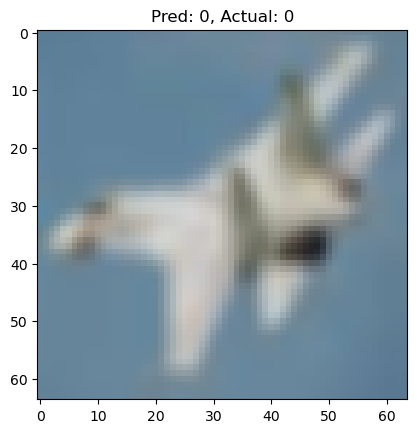

In [10]:
# Predict and visualize results
predictions = model.predict(x_test)
plt.imshow(x_test[10])
plt.title(f"Pred: {predictions[10].argmax()}, Actual: {y_test[10][0]}")
plt.show()

In [11]:
print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 63.45%
